# ADA project : Analyse Data for Pre-Treatment

In [167]:
import bz2
import json
import pandas as pd
import string
import re
import nltk
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

## 1) Pre-processing Data

### 1.1) Import Data

In [168]:
data = []
with bz2.open('quotes-2019-nytimes.json.bz2', "rt") as data_file :
    for line in data_file :
        try :
            lignedata = json.loads(line)
            data.append(lignedata)
        except:
            continue

df = pd.DataFrame()

df["quoteID"] = list(map(lambda d : d["quoteID"], data))
df["quotation"] = list(map(lambda d : d["quotation"], data))
df["speaker"] = list(map(lambda d : d["speaker"], data))
df["qids"] = list(map(lambda d : d["qids"], data))
df["date"] = list(map(lambda d : d["date"], data))
df["numOccurrences"] = list(map(lambda d : d["numOccurrences"], data))
df["probas"] = list(map(lambda d : d["probas"], data))
df["urls"] = list(map(lambda d : d["urls"], data))
df["phase"] = list(map(lambda d : d["phase"], data))

df.head()

quoteID                                          quotation  \
0  2019-04-17-024782                It is not a low-income immigration,   
1  2019-04-02-001128  a champion figure skater switching to roller s...   
2  2019-05-09-055187  It makes it much more difficult for him to mak...   
3  2019-10-31-056366                       It puts me in a predicament,   
4  2019-01-04-001792                                  A Pile of Leaves.   

          speaker                                               qids  \
0    James Fisher  [Q16213953, Q20707104, Q43143598, Q58886302, Q...   
1     John Updike                                          [Q105756]   
2            None                                                 []   
3  Xavier Becerra                                         [Q1855840]   
4            None                                                 []   

                  date  numOccurrences  \
0  2019-04-17 13:31:18               1   
1  2019-04-02 14:58:33               2   
2  2019-05-09 18:11:29               1   
3  2019-10-31 16:45:15               3   
4  2019-01-04 10:00:07               1   

                                              probas  \
0           [[James Fisher, 0.7475], [None, 0.2525]]   
1            [[John Updike, 0.5856], [None, 0.4144]]   
2  [[None, 0.6493], [President Bill Clinton, 0.27...   
3  [[Xavier Becerra, 0.9065], [None, 0.0909], [St...   
4          [[None, 0.8737], [Jason Fulford, 0.1263]]   

                                                urls phase  
0  [https://www.nytimes.com/2019/04/17/realestate...     E  
1  [https://www.nytimes.com/2019/04/02/opinion/vl...     E  
2  [http://mobile.nytimes.com/2019/05/09/world/as...     E  
3  [http://www.nytimes.com/2019/10/31/technology/...     E  
4  [https://www.nytimes.com/2019/01/04/books/revi...     E

### 1.2) Are quotations unique?

In [169]:
print(f"Are quotations unique? {df.quotation.is_unique}")

Are quotations unique? True


### 1.3) Punctuation Removal

In [170]:
# Defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

# Storing the puntuation free text
df['quote_punctfree']= df['quotation'].apply(lambda x: remove_punctuation(x))

df.head()

# Question : garder les "-" ?? (cf. low-income)

quoteID                                          quotation  \
0  2019-04-17-024782                It is not a low-income immigration,   
1  2019-04-02-001128  a champion figure skater switching to roller s...   
2  2019-05-09-055187  It makes it much more difficult for him to mak...   
3  2019-10-31-056366                       It puts me in a predicament,   
4  2019-01-04-001792                                  A Pile of Leaves.   

          speaker                                               qids  \
0    James Fisher  [Q16213953, Q20707104, Q43143598, Q58886302, Q...   
1     John Updike                                          [Q105756]   
2            None                                                 []   
3  Xavier Becerra                                         [Q1855840]   
4            None                                                 []   

                  date  numOccurrences  \
0  2019-04-17 13:31:18               1   
1  2019-04-02 14:58:33               2   
2  2019-05-09 18:11:29               1   
3  2019-10-31 16:45:15               3   
4  2019-01-04 10:00:07               1   

                                              probas  \
0           [[James Fisher, 0.7475], [None, 0.2525]]   
1            [[John Updike, 0.5856], [None, 0.4144]]   
2  [[None, 0.6493], [President Bill Clinton, 0.27...   
3  [[Xavier Becerra, 0.9065], [None, 0.0909], [St...   
4          [[None, 0.8737], [Jason Fulford, 0.1263]]   

                                                urls phase  \
0  [https://www.nytimes.com/2019/04/17/realestate...     E   
1  [https://www.nytimes.com/2019/04/02/opinion/vl...     E   
2  [http://mobile.nytimes.com/2019/05/09/world/as...     E   
3  [http://www.nytimes.com/2019/10/31/technology/...     E   
4  [https://www.nytimes.com/2019/01/04/books/revi...     E   

                                     quote_punctfree  
0                  It is not a lowincome immigration  
1  a champion figure skater switching to roller s...  
2  It makes it much more difficult for him to mak...  
3                        It puts me in a predicament  
4                                   A Pile of Leaves

### 1.4) Lowering the text

In [171]:
df['quote_punctfree_low'] = df['quote_punctfree'].apply(lambda x: x.lower())

df.head()

quoteID                                          quotation  \
0  2019-04-17-024782                It is not a low-income immigration,   
1  2019-04-02-001128  a champion figure skater switching to roller s...   
2  2019-05-09-055187  It makes it much more difficult for him to mak...   
3  2019-10-31-056366                       It puts me in a predicament,   
4  2019-01-04-001792                                  A Pile of Leaves.   

          speaker                                               qids  \
0    James Fisher  [Q16213953, Q20707104, Q43143598, Q58886302, Q...   
1     John Updike                                          [Q105756]   
2            None                                                 []   
3  Xavier Becerra                                         [Q1855840]   
4            None                                                 []   

                  date  numOccurrences  \
0  2019-04-17 13:31:18               1   
1  2019-04-02 14:58:33               2   
2  2019-05-09 18:11:29               1   
3  2019-10-31 16:45:15               3   
4  2019-01-04 10:00:07               1   

                                              probas  \
0           [[James Fisher, 0.7475], [None, 0.2525]]   
1            [[John Updike, 0.5856], [None, 0.4144]]   
2  [[None, 0.6493], [President Bill Clinton, 0.27...   
3  [[Xavier Becerra, 0.9065], [None, 0.0909], [St...   
4          [[None, 0.8737], [Jason Fulford, 0.1263]]   

                                                urls phase  \
0  [https://www.nytimes.com/2019/04/17/realestate...     E   
1  [https://www.nytimes.com/2019/04/02/opinion/vl...     E   
2  [http://mobile.nytimes.com/2019/05/09/world/as...     E   
3  [http://www.nytimes.com/2019/10/31/technology/...     E   
4  [https://www.nytimes.com/2019/01/04/books/revi...     E   

                                     quote_punctfree  \
0                  It is not a lowincome immigration   
1  a champion figure skater switching to roller s...   
2  It makes it much more difficult for him to mak...   
3                        It puts me in a predicament   
4                                   A Pile of Leaves   

                                 quote_punctfree_low  
0                  it is not a lowincome immigration  
1  a champion figure skater switching to roller s...  
2  it makes it much more difficult for him to mak...  
3                        it puts me in a predicament  
4                                   a pile of leaves

### 1.5) Tokenization

In [172]:
# Defining function for tokenization
def tokenization(text):
    tokens = re.split('\W+',text)
    return tokens

# Applying function to the column
df['quote_punctfree_low_token']= df['quote_punctfree_low'].apply(lambda x: tokenization(x))

df.head()

quoteID                                          quotation  \
0  2019-04-17-024782                It is not a low-income immigration,   
1  2019-04-02-001128  a champion figure skater switching to roller s...   
2  2019-05-09-055187  It makes it much more difficult for him to mak...   
3  2019-10-31-056366                       It puts me in a predicament,   
4  2019-01-04-001792                                  A Pile of Leaves.   

          speaker                                               qids  \
0    James Fisher  [Q16213953, Q20707104, Q43143598, Q58886302, Q...   
1     John Updike                                          [Q105756]   
2            None                                                 []   
3  Xavier Becerra                                         [Q1855840]   
4            None                                                 []   

                  date  numOccurrences  \
0  2019-04-17 13:31:18               1   
1  2019-04-02 14:58:33               2   
2  2019-05-09 18:11:29               1   
3  2019-10-31 16:45:15               3   
4  2019-01-04 10:00:07               1   

                                              probas  \
0           [[James Fisher, 0.7475], [None, 0.2525]]   
1            [[John Updike, 0.5856], [None, 0.4144]]   
2  [[None, 0.6493], [President Bill Clinton, 0.27...   
3  [[Xavier Becerra, 0.9065], [None, 0.0909], [St...   
4          [[None, 0.8737], [Jason Fulford, 0.1263]]   

                                                urls phase  \
0  [https://www.nytimes.com/2019/04/17/realestate...     E   
1  [https://www.nytimes.com/2019/04/02/opinion/vl...     E   
2  [http://mobile.nytimes.com/2019/05/09/world/as...     E   
3  [http://www.nytimes.com/2019/10/31/technology/...     E   
4  [https://www.nytimes.com/2019/01/04/books/revi...     E   

                                     quote_punctfree  \
0                  It is not a lowincome immigration   
1  a champion figure skater switching to roller s...   
2  It makes it much more difficult for him to mak...   
3                        It puts me in a predicament   
4                                   A Pile of Leaves   

                                 quote_punctfree_low  \
0                  it is not a lowincome immigration   
1  a champion figure skater switching to roller s...   
2  it makes it much more difficult for him to mak...   
3                        it puts me in a predicament   
4                                   a pile of leaves   

                           quote_punctfree_low_token  
0           [it, is, not, a, lowincome, immigration]  
1  [a, champion, figure, skater, switching, to, r...  
2  [it, makes, it, much, more, difficult, for, hi...  
3                 [it, puts, me, in, a, predicament]  
4                              [a, pile, of, leaves]

### 1.6) Stop word removal

In [173]:
# Stop words present in the library
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

# Defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output = [i for i in text if i not in stopwords]
    return output

# Applying the function
df['quote_punctfree_low_token_NoStopWord'] = df['quote_punctfree_low_token'].apply(lambda x: remove_stopwords(x))

df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


quoteID                                          quotation  \
0  2019-04-17-024782                It is not a low-income immigration,   
1  2019-04-02-001128  a champion figure skater switching to roller s...   
2  2019-05-09-055187  It makes it much more difficult for him to mak...   
3  2019-10-31-056366                       It puts me in a predicament,   
4  2019-01-04-001792                                  A Pile of Leaves.   

          speaker                                               qids  \
0    James Fisher  [Q16213953, Q20707104, Q43143598, Q58886302, Q...   
1     John Updike                                          [Q105756]   
2            None                                                 []   
3  Xavier Becerra                                         [Q1855840]   
4            None                                                 []   

                  date  numOccurrences  \
0  2019-04-17 13:31:18               1   
1  2019-04-02 14:58:33               2   
2  2019-05-09 18:11:29               1   
3  2019-10-31 16:45:15               3   
4  2019-01-04 10:00:07               1   

                                              probas  \
0           [[James Fisher, 0.7475], [None, 0.2525]]   
1            [[John Updike, 0.5856], [None, 0.4144]]   
2  [[None, 0.6493], [President Bill Clinton, 0.27...   
3  [[Xavier Becerra, 0.9065], [None, 0.0909], [St...   
4          [[None, 0.8737], [Jason Fulford, 0.1263]]   

                                                urls phase  \
0  [https://www.nytimes.com/2019/04/17/realestate...     E   
1  [https://www.nytimes.com/2019/04/02/opinion/vl...     E   
2  [http://mobile.nytimes.com/2019/05/09/world/as...     E   
3  [http://www.nytimes.com/2019/10/31/technology/...     E   
4  [https://www.nytimes.com/2019/01/04/books/revi...     E   

                                     quote_punctfree  \
0                  It is not a lowincome immigration   
1  a champion figure skater switching to roller s...   
2  It makes it much more difficult for him to mak...   
3                        It puts me in a predicament   
4                                   A Pile of Leaves   

                                 quote_punctfree_low  \
0                  it is not a lowincome immigration   
1  a champion figure skater switching to roller s...   
2  it makes it much more difficult for him to mak...   
3                        it puts me in a predicament   
4                                   a pile of leaves   

                           quote_punctfree_low_token  \
0           [it, is, not, a, lowincome, immigration]   
1  [a, champion, figure, skater, switching, to, r...   
2  [it, makes, it, much, more, difficult, for, hi...   
3                 [it, puts, me, in, a, predicament]   
4                              [a, pile, of, leaves]   

                quote_punctfree_low_token_NoStopWord  
0                           [lowincome, immigration]  
1  [champion, figure, skater, switching, roller, ...  
2  [makes, much, difficult, make, compromises, ne...  
3                                [puts, predicament]  
4                                     [pile, leaves]

### 1.7) Lemmatization

In [174]:
# Defining the object for Lemmatization
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

# Defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

# Applying the function
df['quote_punctfree_low_token_NoStopWord_lemm'] = df['quote_punctfree_low_token_NoStopWord'].apply(lambda x: lemmatizer(x))
df['final_quote'] = df['quote_punctfree_low_token_NoStopWord_lemm']

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\felic\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


quoteID                                          quotation  \
0  2019-04-17-024782                It is not a low-income immigration,   
1  2019-04-02-001128  a champion figure skater switching to roller s...   
2  2019-05-09-055187  It makes it much more difficult for him to mak...   
3  2019-10-31-056366                       It puts me in a predicament,   
4  2019-01-04-001792                                  A Pile of Leaves.   

          speaker                                               qids  \
0    James Fisher  [Q16213953, Q20707104, Q43143598, Q58886302, Q...   
1     John Updike                                          [Q105756]   
2            None                                                 []   
3  Xavier Becerra                                         [Q1855840]   
4            None                                                 []   

                  date  numOccurrences  \
0  2019-04-17 13:31:18               1   
1  2019-04-02 14:58:33               2   
2  2019-05-09 18:11:29               1   
3  2019-10-31 16:45:15               3   
4  2019-01-04 10:00:07               1   

                                              probas  \
0           [[James Fisher, 0.7475], [None, 0.2525]]   
1            [[John Updike, 0.5856], [None, 0.4144]]   
2  [[None, 0.6493], [President Bill Clinton, 0.27...   
3  [[Xavier Becerra, 0.9065], [None, 0.0909], [St...   
4          [[None, 0.8737], [Jason Fulford, 0.1263]]   

                                                urls phase  \
0  [https://www.nytimes.com/2019/04/17/realestate...     E   
1  [https://www.nytimes.com/2019/04/02/opinion/vl...     E   
2  [http://mobile.nytimes.com/2019/05/09/world/as...     E   
3  [http://www.nytimes.com/2019/10/31/technology/...     E   
4  [https://www.nytimes.com/2019/01/04/books/revi...     E   

                                     quote_punctfree  \
0                  It is not a lowincome immigration   
1  a champion figure skater switching to roller s...   
2  It makes it much more difficult for him to mak...   
3                        It puts me in a predicament   
4                                   A Pile of Leaves   

                                 quote_punctfree_low  \
0                  it is not a lowincome immigration   
1  a champion figure skater switching to roller s...   
2  it makes it much more difficult for him to mak...   
3                        it puts me in a predicament   
4                                   a pile of leaves   

                           quote_punctfree_low_token  \
0           [it, is, not, a, lowincome, immigration]   
1  [a, champion, figure, skater, switching, to, r...   
2  [it, makes, it, much, more, difficult, for, hi...   
3                 [it, puts, me, in, a, predicament]   
4                              [a, pile, of, leaves]   

                quote_punctfree_low_token_NoStopWord  \
0                           [lowincome, immigration]   
1  [champion, figure, skater, switching, roller, ...   
2  [makes, much, difficult, make, compromises, ne...   
3                                [puts, predicament]   
4                                     [pile, leaves]   

           quote_punctfree_low_token_NoStopWord_lemm  \
0                           [lowincome, immigration]   
1  [champion, figure, skater, switching, roller, ...   
2  [make, much, difficult, make, compromise, needed]   
3                                 [put, predicament]   
4                                       [pile, leaf]   

                                         final_quote  
0                           [lowincome, immigration]  
1  [champion, figure, skater, switching, roller, ...  
2  [make, much, difficult, make, compromise, needed]  
3                                 [put, predicament]  
4                                       [pile, leaf]

### 1.8) Do we have only phase E quotations?

In [175]:
df.groupby(df.phase).agg('count')

quoteID  quotation  speaker    qids    date  numOccurrences  probas  \
phase                                                                        
E       207527     207527   207527  207527  207527          207527  207527   

         urls  quote_punctfree  quote_punctfree_low  \
phase                                                 
E      207527           207527               207527   

       quote_punctfree_low_token  quote_punctfree_low_token_NoStopWord  \
phase                                                                    
E                         207527                                207527   

       quote_punctfree_low_token_NoStopWord_lemm  final_quote  
phase                                                          
E                                         207527       207527

## 2) Pre-analyzing Data

### 2.1) Comparison before and after pre-processing

 #### 2.1.1) Analysis about characters

In [176]:
# Creation of a new table for the analysis
analyze = df.loc[:, ['quoteID', 'quotation', 'final_quote']]

In [177]:
# Creation of a new column with the number of characters per citation (spaces included)
analyze["ch_quote"] = analyze["quotation"].apply(lambda x: len(x))

analyze.head()

quoteID                                          quotation  \
0  2019-04-17-024782                It is not a low-income immigration,   
1  2019-04-02-001128  a champion figure skater switching to roller s...   
2  2019-05-09-055187  It makes it much more difficult for him to mak...   
3  2019-10-31-056366                       It puts me in a predicament,   
4  2019-01-04-001792                                  A Pile of Leaves.   

                                         final_quote  ch_quote  
0                           [lowincome, immigration]        35  
1  [champion, figure, skater, switching, roller, ...        52  
2  [make, much, difficult, make, compromise, needed]        71  
3                                 [put, predicament]        28  
4                                       [pile, leaf]        17

In [178]:
# Creation of a new column with the number of characters of the final quote without tokenization
analyze["ch_final_quote"] = (df["final_quote"].apply(lambda x: ' '.join(x))).apply(lambda x: len(x))

analyze.head()

quoteID                                          quotation  \
0  2019-04-17-024782                It is not a low-income immigration,   
1  2019-04-02-001128  a champion figure skater switching to roller s...   
2  2019-05-09-055187  It makes it much more difficult for him to mak...   
3  2019-10-31-056366                       It puts me in a predicament,   
4  2019-01-04-001792                                  A Pile of Leaves.   

                                         final_quote  ch_quote  ch_final_quote  
0                           [lowincome, immigration]        35              21  
1  [champion, figure, skater, switching, roller, ...        52              45  
2  [make, much, difficult, make, compromise, needed]        71              42  
3                                 [put, predicament]        28              15  
4                                       [pile, leaf]        17               9

In [179]:
# Creation of a new column with the percentage of characters removed after pre-processing
analyze["ch_removed"] = (analyze["ch_quote"]-analyze["ch_final_quote"])*100/analyze["ch_quote"]

analyze.head()

quoteID                                          quotation  \
0  2019-04-17-024782                It is not a low-income immigration,   
1  2019-04-02-001128  a champion figure skater switching to roller s...   
2  2019-05-09-055187  It makes it much more difficult for him to mak...   
3  2019-10-31-056366                       It puts me in a predicament,   
4  2019-01-04-001792                                  A Pile of Leaves.   

                                         final_quote  ch_quote  \
0                           [lowincome, immigration]        35   
1  [champion, figure, skater, switching, roller, ...        52   
2  [make, much, difficult, make, compromise, needed]        71   
3                                 [put, predicament]        28   
4                                       [pile, leaf]        17   

   ch_final_quote  ch_removed  
0              21   40.000000  
1              45   13.461538  
2              42   40.845070  
3              15   46.428571  
4               9   47.058824

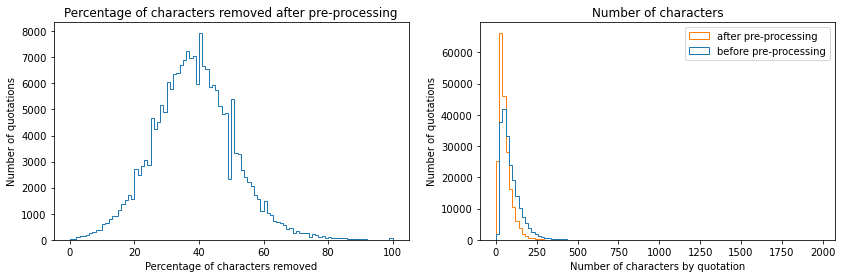

In [180]:
# Plot the distribution of the number of characters by quotation before pre-processing data and after pre-processing data
# And plot of the distribution of the percentage of characters removed after pre-processing

fig, ax = plt.subplots(1,2,figsize=(14,4))

ax[0].hist(analyze.ch_removed, bins=100, histtype='step')
ax[0].set_title('Percentage of characters removed after pre-processing')
ax[0].set_xlabel('Percentage of characters removed')
ax[0].set_ylabel('Number of quotations')

ax[1].hist([analyze.ch_quote, analyze.ch_final_quote], bins=100, histtype='step', label=['before pre-processing', 'after pre-processing'])
ax[1].set_title('Number of characters')
ax[1].set_xlabel('Number of characters by quotation')
ax[1].set_ylabel('Number of quotations')

plt.legend()
plt.show()

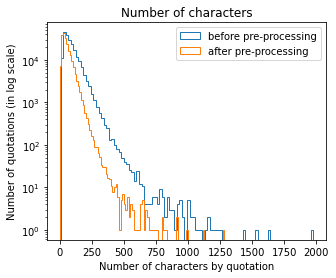

In [181]:
# Same but with log scale for the x-axis
plt.figure(figsize=(5,4))
array0 = plt.hist(analyze.ch_quote, bins=100, log=True, histtype='step')
array1 = plt.hist(analyze.ch_final_quote, bins=100, log=True, histtype='step')
plt.xlabel('Number of characters by quotation')
plt.ylabel('Number of quotations (in log scale)')
plt.title('Number of characters')
plt.legend(['before pre-processing', 'after pre-processing'])
plt.show()

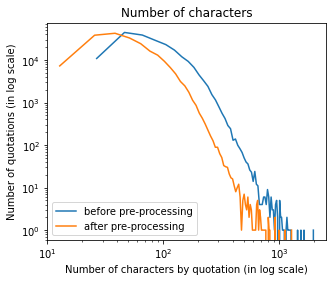

In [182]:
# Same but with log scale for the x-axis and the y-axis
plt.figure(figsize=(5,4))
plt.loglog(array0[1][1:],array0[0])
plt.loglog(array1[1][1:],array1[0])
plt.xlabel('Number of characters by quotation (in log scale)')
plt.ylabel('Number of quotations (in log scale)')
plt.title('Number of characters')
plt.legend(['before pre-processing', 'after pre-processing'])
plt.show()

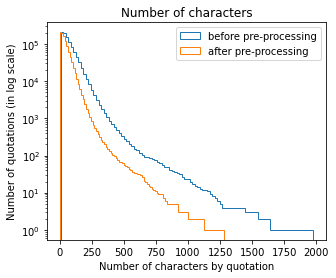

In [183]:
# Same but with log scale for the x-axis and cumulative
plt.figure(figsize=(5,4))
array_cumulative0 = plt.hist(analyze.ch_quote, bins=100, log=True, histtype='step', cumulative=-1)
array_cumulative1 = plt.hist(analyze.ch_final_quote, bins=100, log=True, histtype='step', cumulative=-1)
plt.xlabel('Number of characters by quotation')
plt.ylabel('Number of quotations (in log scale)')
plt.title('Number of characters')
plt.legend(['before pre-processing', 'after pre-processing'])
plt.show()

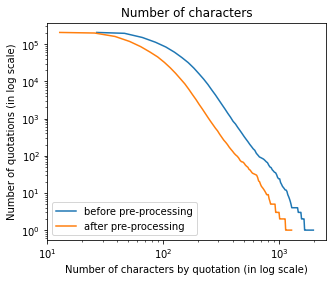

In [184]:
# Same but with log scale for the x-axis and the y-axis and cumulative
plt.figure(figsize=(5,4))
plt.loglog(array_cumulative0[1][1:],array_cumulative0[0])
plt.loglog(array_cumulative1[1][1:],array_cumulative1[0])
plt.xlabel('Number of characters by quotation (in log scale)')
plt.ylabel('Number of quotations (in log scale)')
plt.title('Number of characters')
plt.legend(['before pre-processing', 'after pre-processing'])
plt.show()

#### 2.1.2) Analysis about words

In [185]:
# Creation of a two columns with the number of words per citation before and after NoStopWord (cf. pre-processing)
analyze["wd_quote"] = df["quote_punctfree_low_token"].apply(lambda x: len(x))
analyze["wd_final_quote"] = df["final_quote"].apply(lambda x: len(x))

analyze.head()

quoteID                                          quotation  \
0  2019-04-17-024782                It is not a low-income immigration,   
1  2019-04-02-001128  a champion figure skater switching to roller s...   
2  2019-05-09-055187  It makes it much more difficult for him to mak...   
3  2019-10-31-056366                       It puts me in a predicament,   
4  2019-01-04-001792                                  A Pile of Leaves.   

                                         final_quote  ch_quote  \
0                           [lowincome, immigration]        35   
1  [champion, figure, skater, switching, roller, ...        52   
2  [make, much, difficult, make, compromise, needed]        71   
3                                 [put, predicament]        28   
4                                       [pile, leaf]        17   

   ch_final_quote  ch_removed  wd_quote  wd_final_quote  
0              21   40.000000         6               2  
1              45   13.461538         8               6  
2              42   40.845070        13               6  
3              15   46.428571         6               2  
4               9   47.058824         4               2

In [186]:
# Creation of a new column with the percentage of words removed after pre-processing
analyze["wd_removed"] = (analyze["wd_quote"]-analyze["wd_final_quote"])*100/analyze["wd_quote"]

analyze.head()

quoteID                                          quotation  \
0  2019-04-17-024782                It is not a low-income immigration,   
1  2019-04-02-001128  a champion figure skater switching to roller s...   
2  2019-05-09-055187  It makes it much more difficult for him to mak...   
3  2019-10-31-056366                       It puts me in a predicament,   
4  2019-01-04-001792                                  A Pile of Leaves.   

                                         final_quote  ch_quote  \
0                           [lowincome, immigration]        35   
1  [champion, figure, skater, switching, roller, ...        52   
2  [make, much, difficult, make, compromise, needed]        71   
3                                 [put, predicament]        28   
4                                       [pile, leaf]        17   

   ch_final_quote  ch_removed  wd_quote  wd_final_quote  wd_removed  
0              21   40.000000         6               2   66.666667  
1              45   13.461538         8               6   25.000000  
2              42   40.845070        13               6   53.846154  
3              15   46.428571         6               2   66.666667  
4               9   47.058824         4               2   50.000000

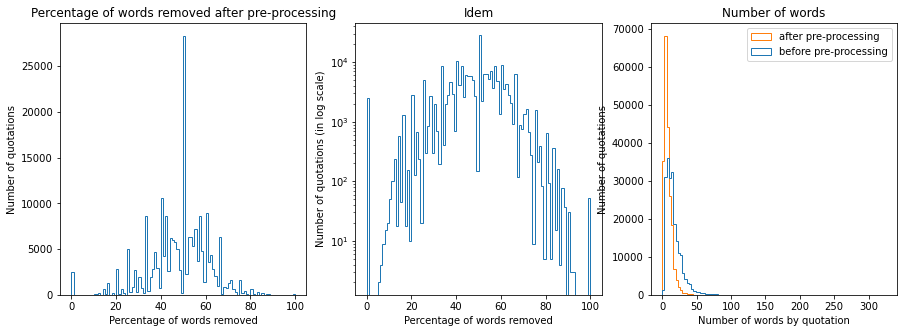

In [187]:
# Plot the distribution of the number of words by quotation before pre-processing data and after pre-processing data
# And plot of the distribution of the percentage of words removed after pre-processing

fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].hist(analyze.wd_removed, bins=100, histtype='step')
ax[0].set_title('Percentage of words removed after pre-processing')
ax[0].set_xlabel('Percentage of words removed')
ax[0].set_ylabel('Number of quotations')

ax[1].hist(analyze.wd_removed, bins=100, log=True, histtype='step')
ax[1].set_title('Idem')
ax[1].set_xlabel('Percentage of words removed')
ax[1].set_ylabel('Number of quotations (in log scale)')

ax[2].hist([analyze.wd_quote, analyze.wd_final_quote], bins=100, histtype='step', label=['before pre-processing', 'after pre-processing'])
ax[2].set_title('Number of words')
ax[2].set_xlabel('Number of words by quotation')
ax[2].set_ylabel('Number of quotations')

plt.legend()
plt.show()

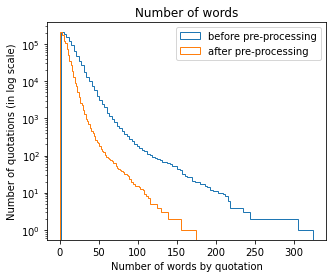

In [188]:
# Same but with log scale for the x-axis and cumulative
plt.figure(figsize=(5,4))
array_cumulative0 = plt.hist(analyze.wd_quote, bins=100, log=True, histtype='step', cumulative=-1)
array_cumulative1 = plt.hist(analyze.wd_final_quote, bins=100, log=True, histtype='step', cumulative=-1)
plt.xlabel('Number of words by quotation')
plt.ylabel('Number of quotations (in log scale)')
plt.title('Number of words')
plt.legend(['before pre-processing', 'after pre-processing'])
plt.show()

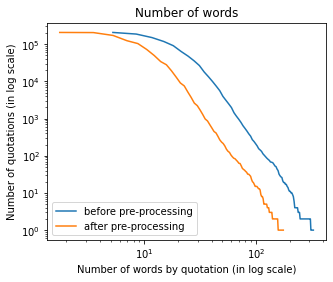

In [189]:
# Same but with log scale for the x-axis and the y-axis and cumulative
plt.figure(figsize=(5,4))
plt.loglog(array_cumulative0[1][1:],array_cumulative0[0])
plt.loglog(array_cumulative1[1][1:],array_cumulative1[0])
plt.xlabel('Number of words by quotation (in log scale)')
plt.ylabel('Number of quotations (in log scale)')
plt.title('Number of words')
plt.legend(['before pre-processing', 'after pre-processing'])
plt.show()

### 2.2) Selection of words AND comparison before and after selection

In [165]:
analyze[analyze['wd_final_quote']<10]['final_quote'].head(20)

0                              [lowincome, immigration]
1     [champion, figure, skater, switching, roller, ...
2     [make, much, difficult, make, compromise, needed]
3                                    [put, predicament]
4                                          [pile, leaf]
5                                       [senator, call]
6                                [thorn, side, cabinet]
7                                                [lark]
8                    [success, relief, technical, feat]
9          [always, appreciates, respect, work, advice]
10          [crazy, cant, even, really, explain, right]
12    [soon, gumballs, hit, dont, hit, luke, wilson,...
14                 [ive, never, show, thats, immediate]
16                  [ive, never, seen, base, energized]
17                            [dangerous, walk, street]
18    [betty, succinct, point, steely, eye, respecte...
20            [didnt, seem, like, worldwide, big, todo]
21                       [taken, heck, long, tim

In [190]:
# Create a column with the number of characters per word
analyze["ch_per_wd"] = analyze["final_quote"].apply(lambda x: [len(x[i]) for i in range (0, len(x))])
analyze.head()

quoteID                                          quotation  \
0  2019-04-17-024782                It is not a low-income immigration,   
1  2019-04-02-001128  a champion figure skater switching to roller s...   
2  2019-05-09-055187  It makes it much more difficult for him to mak...   
3  2019-10-31-056366                       It puts me in a predicament,   
4  2019-01-04-001792                                  A Pile of Leaves.   

                                         final_quote  ch_quote  \
0                           [lowincome, immigration]        35   
1  [champion, figure, skater, switching, roller, ...        52   
2  [make, much, difficult, make, compromise, needed]        71   
3                                 [put, predicament]        28   
4                                       [pile, leaf]        17   

   ch_final_quote  ch_removed  wd_quote  wd_final_quote  wd_removed  \
0              21   40.000000         6               2   66.666667   
1              45   13.461538         8               6   25.000000   
2              42   40.845070        13               6   53.846154   
3              15   46.428571         6               2   66.666667   
4               9   47.058824         4               2   50.000000   

             ch_per_wd  
0              [9, 11]  
1   [8, 6, 6, 9, 6, 5]  
2  [4, 4, 9, 4, 10, 6]  
3              [3, 11]  
4               [4, 4]

In [191]:
# Median of number of character per words
list_ch_per_word = []
for ligne in analyze["ch_per_wd"] :
    list_ch_per_word += ligne

pd.Series(list_ch_per_word).median()    

6.0

In [196]:
# Dropping words with less than 3 characters (3 included)

def drop_words(quote) :
    new_quote = []
    for word in quote :
        if len(word) > 3 :
            new_quote.append(word)
    return new_quote
   
df["final_quote_SelectWd"] = df["final_quote"].apply(drop_words) 

df.head()

quoteID                                          quotation  \
0  2019-04-17-024782                It is not a low-income immigration,   
1  2019-04-02-001128  a champion figure skater switching to roller s...   
2  2019-05-09-055187  It makes it much more difficult for him to mak...   
3  2019-10-31-056366                       It puts me in a predicament,   
4  2019-01-04-001792                                  A Pile of Leaves.   

          speaker                                               qids  \
0    James Fisher  [Q16213953, Q20707104, Q43143598, Q58886302, Q...   
1     John Updike                                          [Q105756]   
2            None                                                 []   
3  Xavier Becerra                                         [Q1855840]   
4            None                                                 []   

                  date  numOccurrences  \
0  2019-04-17 13:31:18               1   
1  2019-04-02 14:58:33               2   
2  2019-05-09 18:11:29               1   
3  2019-10-31 16:45:15               3   
4  2019-01-04 10:00:07               1   

                                              probas  \
0           [[James Fisher, 0.7475], [None, 0.2525]]   
1            [[John Updike, 0.5856], [None, 0.4144]]   
2  [[None, 0.6493], [President Bill Clinton, 0.27...   
3  [[Xavier Becerra, 0.9065], [None, 0.0909], [St...   
4          [[None, 0.8737], [Jason Fulford, 0.1263]]   

                                                urls phase  \
0  [https://www.nytimes.com/2019/04/17/realestate...     E   
1  [https://www.nytimes.com/2019/04/02/opinion/vl...     E   
2  [http://mobile.nytimes.com/2019/05/09/world/as...     E   
3  [http://www.nytimes.com/2019/10/31/technology/...     E   
4  [https://www.nytimes.com/2019/01/04/books/revi...     E   

                                     quote_punctfree  \
0                  It is not a lowincome immigration   
1  a champion figure skater switching to roller s...   
2  It makes it much more difficult for him to mak...   
3                        It puts me in a predicament   
4                                   A Pile of Leaves   

                                 quote_punctfree_low  \
0                  it is not a lowincome immigration   
1  a champion figure skater switching to roller s...   
2  it makes it much more difficult for him to mak...   
3                        it puts me in a predicament   
4                                   a pile of leaves   

                           quote_punctfree_low_token  \
0           [it, is, not, a, lowincome, immigration]   
1  [a, champion, figure, skater, switching, to, r...   
2  [it, makes, it, much, more, difficult, for, hi...   
3                 [it, puts, me, in, a, predicament]   
4                              [a, pile, of, leaves]   

                quote_punctfree_low_token_NoStopWord  \
0                           [lowincome, immigration]   
1  [champion, figure, skater, switching, roller, ...   
2  [makes, much, difficult, make, compromises, ne...   
3                                [puts, predicament]   
4                                     [pile, leaves]   

           quote_punctfree_low_token_NoStopWord_lemm  \
0                           [lowincome, immigration]   
1  [champion, figure, skater, switching, roller, ...   
2  [make, much, difficult, make, compromise, needed]   
3                                 [put, predicament]   
4                                       [pile, leaf]   

                                         final_quote  \
0                           [lowincome, immigration]   
1  [champion, figure, skater, switching, roller, ...   
2  [make, much, difficult, make, compromise, needed]   
3                                 [put, predicament]   
4                                       [pile, leaf]   

                                final_quote_SelectWd  
0                           [lowincome, immigration]  
1  [champion, figure, skater, swit

In [198]:
# Add quotations words selected to analyze dataframe :
analyze["final_quote_SelectWd"] = df["final_quote_SelectWd"]

# Create a column with the number of characters per selected word
analyze["ch_per_SelectWd"] = analyze["final_quote_SelectWd"].apply(lambda x: [len(x[i]) for i in range (0, len(x))])
analyze.head()


# Median of number of character per selected words
list_ch_per_word = []
for ligne in analyze["ch_per_SelectWd"] :
    list_ch_per_word += ligne

pd.Series(list_ch_per_word).median() 

6.0

### 2.3) Selection of quotations AND comparison before and after selection

In [205]:
# Creation of a new dataframe where we will select only interesting quotations
df_select = df.copy()
df_select = df.drop(['quote_punctfree', 'quote_punctfree_low', 'quote_punctfree_low_token', 'quote_punctfree_low_token_NoStopWord', 'quote_punctfree_low_token_NoStopWord_lemm', 'final_quote'], 1)
df_select.head()

C:\Users\felic\AppData\Local\Temp/ipykernel_30260/1028214953.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_select = df.drop(['quote_punctfree', 'quote_punctfree_low', 'quote_punctfree_low_token', 'quote_punctfree_low_token_NoStopWord', 'quote_punctfree_low_token_NoStopWord_lemm', 'final_quote'], 1)


quoteID                                          quotation  \
0  2019-04-17-024782                It is not a low-income immigration,   
1  2019-04-02-001128  a champion figure skater switching to roller s...   
2  2019-05-09-055187  It makes it much more difficult for him to mak...   
3  2019-10-31-056366                       It puts me in a predicament,   
4  2019-01-04-001792                                  A Pile of Leaves.   

          speaker                                               qids  \
0    James Fisher  [Q16213953, Q20707104, Q43143598, Q58886302, Q...   
1     John Updike                                          [Q105756]   
2            None                                                 []   
3  Xavier Becerra                                         [Q1855840]   
4            None                                                 []   

                  date  numOccurrences  \
0  2019-04-17 13:31:18               1   
1  2019-04-02 14:58:33               2   
2  2019-05-09 18:11:29               1   
3  2019-10-31 16:45:15               3   
4  2019-01-04 10:00:07               1   

                                              probas  \
0           [[James Fisher, 0.7475], [None, 0.2525]]   
1            [[John Updike, 0.5856], [None, 0.4144]]   
2  [[None, 0.6493], [President Bill Clinton, 0.27...   
3  [[Xavier Becerra, 0.9065], [None, 0.0909], [St...   
4          [[None, 0.8737], [Jason Fulford, 0.1263]]   

                                                urls phase  \
0  [https://www.nytimes.com/2019/04/17/realestate...     E   
1  [https://www.nytimes.com/2019/04/02/opinion/vl...     E   
2  [http://mobile.nytimes.com/2019/05/09/world/as...     E   
3  [http://www.nytimes.com/2019/10/31/technology/...     E   
4  [https://www.nytimes.com/2019/01/04/books/revi...     E   

                                final_quote_SelectWd  
0                           [lowincome, immigration]  
1  [champion, figure, skater, switching, roller, ...  
2  [make, much, difficult, make, compromise, needed]  
3                                      [predicament]  
4                                       [pile, leaf]

In [206]:
len(df_select)

207527

In [207]:
# Dropping rows where the main author is None
indexNames = df_select[df_select['speaker']=='None'].index
df_select.drop(indexNames, inplace=True)
df_select.head()

quoteID                                          quotation  \
0  2019-04-17-024782                It is not a low-income immigration,   
1  2019-04-02-001128  a champion figure skater switching to roller s...   
3  2019-10-31-056366                       It puts me in a predicament,   
5  2019-08-15-002017                     A Senator we can call our own.   
8  2019-07-22-032883     It's a success, a relief and a technical feat,   

          speaker                                               qids  \
0    James Fisher  [Q16213953, Q20707104, Q43143598, Q58886302, Q...   
1     John Updike                                          [Q105756]   
3  Xavier Becerra                                         [Q1855840]   
5        Tom Rath                                         [Q7817334]   
8  Florence Parly                                         [Q3074013]   

                  date  numOccurrences  \
0  2019-04-17 13:31:18               1   
1  2019-04-02 14:58:33               2   
3  2019-10-31 16:45:15               3   
5  2019-08-15 22:36:33               1   
8  2019-07-22 02:37:50              21   

                                              probas  \
0           [[James Fisher, 0.7475], [None, 0.2525]]   
1            [[John Updike, 0.5856], [None, 0.4144]]   
3  [[Xavier Becerra, 0.9065], [None, 0.0909], [St...   
5  [[Tom Rath, 0.7598], [None, 0.1993], [Warren R...   
8         [[Florence Parly, 0.9262], [None, 0.0738]]   

                                                urls phase  \
0  [https://www.nytimes.com/2019/04/17/realestate...     E   
1  [https://www.nytimes.com/2019/04/02/opinion/vl...     E   
3  [http://www.nytimes.com/2019/10/31/technology/...     E   
5  [http://www.nytimes.com/2019/08/15/us/politics...     E   
8  [http://www.breitbart.com/news/french-submarin...     E   

                                final_quote_SelectWd  
0                           [lowincome, immigration]  
1  [champion, figure, skater, switching, roller, ...  
3                                      [predicament]  
5                                    [senator, call]  
8                 [success, relief, technical, feat]

In [204]:
len(df_select)

131945

(array([19974., 19555., 18039., 17164., 15789., 13642., 11970.,  8722.,
         5336.,  1754.]),
 array([   0. ,  660.6, 1321.2, 1981.8, 2642.4, 3303. , 3963.6, 4624.2,
        5284.8, 5945.4, 6606. ]),
 <BarContainer object of 10 artists>)

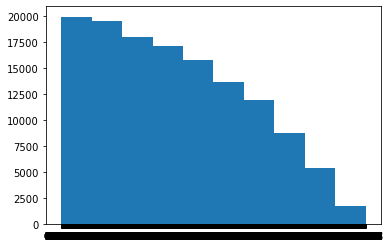

In [209]:
# A continuer : regarder la distribution des probas des speakers pour savoir où mettre la limite de proba pour sélectionner les citations...
plt.hist(df_select['probas'].apply(lambda x: x[0][1]))

(array([19974., 19555., 18039., 17164., 15789., 13642., 11970.,  8722.,
         5336.,  1754.]),
 array([   0. ,  660.6, 1321.2, 1981.8, 2642.4, 3303. , 3963.6, 4624.2,
        5284.8, 5945.4, 6606. ]),
 <BarContainer object of 10 artists>)

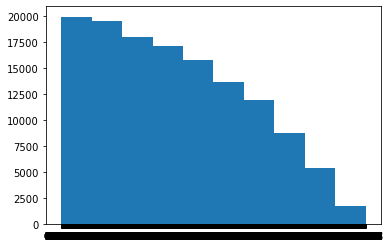

In [229]:
plt.hist([(df_select.loc[i, 'probas'][0][1]) for i in df_select.index])